Routine, die das Bild einliest (Befehl: cv2.imread()) und die
einzelnen Grauwertstufen als Unterbilder aus dem Originalbild ausliest.
Bestimmung des Mittelwertes und der Standardabweichung für jede Stufe und die der Grau
werte.

In [1]:
import numpy as np
import os
import cv2

# get current working directory
path = os.getenv('DATA_PATH')
if not path:
    raise ValueError("DATA_PATH environment variable is not set")

filename = f"{path}\\Versuch2_Messungen\\versuch_2_graukeil.png"
src = cv2.imread(filename)
image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

white = image[:, 0:202] # first pixels for white
light_grey = image[:, 223:395] # next pixels for light grey
mid_grey = image[:, 411:586] # next pixels for mid grey
dark_grey = image[:, 597:764] # next pixels for dark grey
black = image[:, 779:960] # last pixels for black

output_path = os.path.join(path, "Grauwertstufen") # output directory
os.makedirs(output_path, exist_ok=True) # create directory if it does not exist
# Save grayscale images
cv2.imwrite(os.path.join(output_path, "white.png"), white)
cv2.imwrite(os.path.join(output_path, "light_grey.png"), light_grey)
cv2.imwrite(os.path.join(output_path, "mid_grey.png"), mid_grey)
cv2.imwrite(os.path.join(output_path, "dark_grey.png"), dark_grey)
cv2.imwrite(os.path.join(output_path, "black.png"), black)

mean_white = np.mean(white)
mean_light_grey = np.mean(light_grey)
mean_mid_grey = np.mean(mid_grey)
mean_dark_grey = np.mean(dark_grey)
mean_black = np.mean(black)

std_white = np.std(white, ddof=1)
std_light_grey = np.std(light_grey, ddof=1)
std_mid_grey = np.std(mid_grey, ddof=1)
std_dark_grey = np.std(dark_grey, ddof=1)
std_black = np.std(black, ddof=1)

# Display mean and std as table
import pandas as pd
data = {
    'Grauwertstufe': ['Weiß', 'Hellgrau', 'Mittelgrau', 'Dunkelgrau', 'Schwarz'],
    'Mittelwert': [mean_white, mean_light_grey, mean_mid_grey, mean_dark_grey, mean_black],
    'Standardabweichung': [std_white, std_light_grey, std_mid_grey, std_dark_grey, std_black]
}
df = pd.DataFrame(data)
print(df.to_string(index=False))


window_name = 'Graukeil'
cv2.imshow(window_name, image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Grauwertstufe  Mittelwert  Standardabweichung
         Weiß  206.681321            3.276231
     Hellgrau  156.214400            2.834210
   Mittelgrau  108.265504            4.634426
   Dunkelgrau   61.489279            5.040507
      Schwarz   27.984126            2.667411


Routine, die die 10 Bilder einliest, in double umwandelt, die Farbbilder
in Grauwertbilder umrechnet und ihren pixelweisen Mittelwert berechnet. 
Das Mittelwertbild ist das Dunkelbild für die gewählte
Belichtungszeit. Das Dunkelbild wird kontrastmaximiert dargestellt.

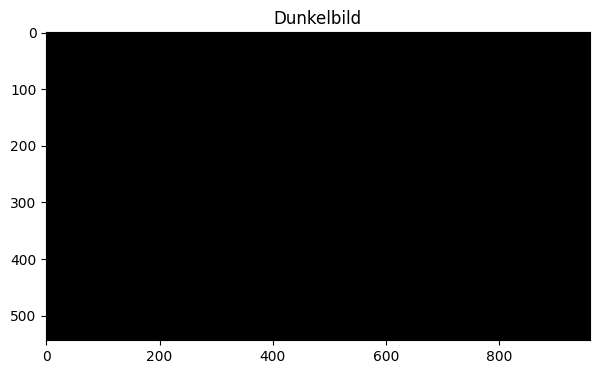

True

In [2]:
images = []
for i in range(1, 11):
    filename = f"{path}\\Versuch2_Messungen\\versuch_2_dunkelbild{i}.png"
    src = cv2.imread(filename)
    image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    image = image.astype(np.float64)
    images.append(image)

# Calculate mean for each pixel
#mean_image = np.zeros(images[0].shape, dtype=np.float64)
#for pixel in images[0]:
#    sum = 0
#    for image in images:
#        sum += image[pixel]
#    mean = sum / len(images)
#    mean_image[pixel] = mean

# Stack images along a new axis and compute the mean along that axis
image_stack = np.stack(images, axis=1)
mean_image = np.mean(image_stack, axis=1)

# Convert the mean image back to uint8 for saving
mean_image_uint8 = np.clip(mean_image, 0, 255).astype(np.uint8)
    
output_path = os.path.join(path, "Dunkelbild") # output directory
os.makedirs(output_path, exist_ok=True) # create directory if it does not exist
# Save dark image
cv2.imwrite(os.path.join(output_path, "dunkelbild_mittelwert.png"), mean_image_uint8)

import matplotlib.pyplot as plt

from skimage.color import rgb2gray

# read an dunkelbild file 
image_path = os.path.join(output_path, "dunkelbild_mittelwert.png") 
src = cv2.imread(image_path)

image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Convert to RGB (OpenCV loads images in BGR by default)
#image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Convert to grayscale
#grayscale_image = rgb2gray(image)

# Plotting using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
ax.imshow(image, cmap=plt.cm.gray, vmin=np.min(image), vmax=np.max(image))
ax.set_title("Dunkelbild")
plt.show()

# save the dark frame image
# Multiply by 255 for saving as a proper image file
cv2.imwrite(os.path.join(output_path, "Dark_frame_max_contrast.png"), image * 255)

In [5]:
images = []
for i in range(1, 11):
    filename = f"{path}\\Versuch2_Messungen\\versuch_2_dunkelbild{i}.png"
    src = cv2.imread(filename)
    image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(os.path.join(output_path, f"TestDunkelBild{i}.png"), image)
    image = image.astype(np.float64)
    images.append(image)

# Calculate mean for each pixel
mean_image = np.zeros(images[0].shape, dtype=np.float64)
for line in range(images[0].shape[0]):
    for pixel in range(images[0].shape[1]):
        summe = 0
        for image in images:
            summe += image[line][pixel]
        mean = summe / len(images)
        mean_image[line][pixel] = mean
print(images[2])

[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]
